In [1]:
# 분류와 회귀
# k-최근접 이웃 분류
# k-최근접 이웃 회귀

In [1]:
# 지도학습, 비지도학습, 섞인 경우
# 데이터 수집 - 정리(전처리) - 분리(훈련/검증) - 알고리즘 준비
# 하둡 스파크, 파이프라인 자동화, 
# 회귀 : 값을 예측
# 인공지능 : 방정식의 해
# 독립변수, 종속변수
# 단순회귀분석 y = ax + b, a 가중치

# 단순회귀 - 선형회귀
 - 데이터 확보(수집)
 - 데이터 전처리
 - 데이터 분할(학습용, (검증용), 테스트용) : 8:2 or 7.5:2.5
 - loop : baseline 모델 선택 및 적용
    - 학습
    - 평가(회귀는 정답과 예측값의 차이 즉 오차)
    if 평가가 안 좋으면 모델을 변경하거나 파라미터를 튜님해서 반복 or 데이터를 다시 전처리 및 특성을 추가
 - 배포

 - 평가 방법
    - 오차평가. MSE(mean seqared error), MAE(mean absolute error)
        - (y-y^) -> 제곱하기, 절댓값
        - (오차를 줄이려면 변화량을 줄이는 값으로 변화 --> 미분), 경사 하강법
        - 이미지 디텍팅, 자연어 처리 오래걸림
        - sqrt[(i to n)Sigma(정답 - 예측)^2 /n -> ME] -->  MSE
        - (i to n)Sigma(abs(정답 - 예측)) / n --> MAE
    

In [24]:
# 연비
import seaborn as sns
df = sns.load_dataset('mpg')

In [25]:
# 학습 전까지의 데이터 처리작업 - 탐색적 데이터 분석 EDA

In [26]:
df.head() # 데이터 구성 보기

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
df.info() # 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [28]:
df.describe() # 중위수(50%)와 평균(mean)의 차이가 크면 이상치가 있을 것임, boxplot

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

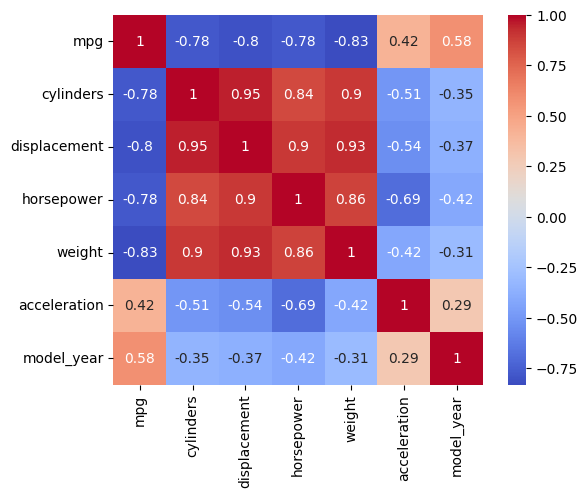

In [31]:
sns.heatmap(corr, cmap='coolwarm', annot=True, cbar=True, square=True)

In [32]:
# 데이터 전처리 작업
# 결측치 처리 : NA, NA와 같은 데이터들..... -1, '-', '?' 특수기호와 같이 의미없는 데이터
# 이상치 처리

In [33]:
temp = df.isna().sum()
temp[temp > 0] #.index

horsepower    6
dtype: int64

In [34]:
df.dtypes
df.isna().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [35]:
df2 = df.dropna()
df2 = df2.reset_index(drop=True)
df2.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [36]:
# 피처선택(속성선택)
    # 수치형 피처선택
    # 동일한 의미를 가지는 피처는 제거
numeric_col = df2.select_dtypes(include=[int,float]) # 종류에 관계없이 수치형 가져오기
numeric_col

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82
388,44.0,4,97.0,52.0,2130,24.6,82
389,32.0,4,135.0,84.0,2295,11.6,82
390,28.0,4,120.0,79.0,2625,18.6,82


<Axes: xlabel='cylinders', ylabel='mpg'>

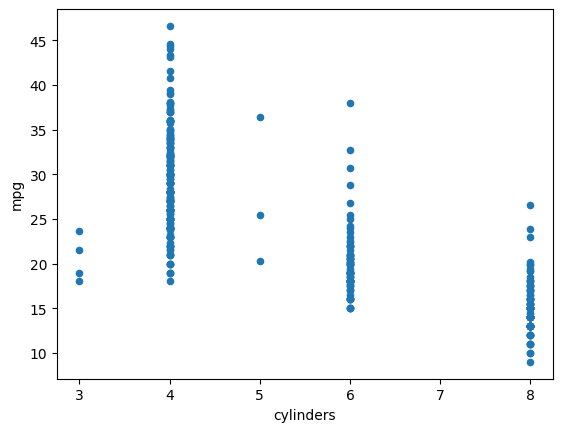

In [37]:
# 연비를 예측하기
# 간단한 피처 엔지니어링 - 적합한 피처를 선택
# 같이 증가하거나 감소하는 상관관계
# seaborn에서 sns.regplot
df2.plot(kind='scatter',x='cylinders',y='mpg')
 

<Axes: xlabel='cylinders', ylabel='mpg'>

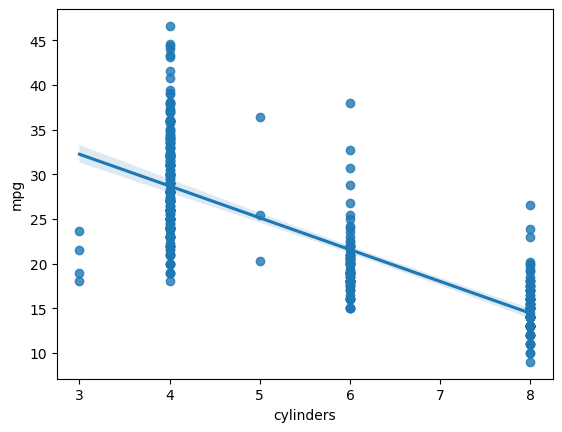

In [38]:
sns.regplot(df2, y='mpg', x='cylinders')

<Axes: xlabel='weight', ylabel='mpg'>

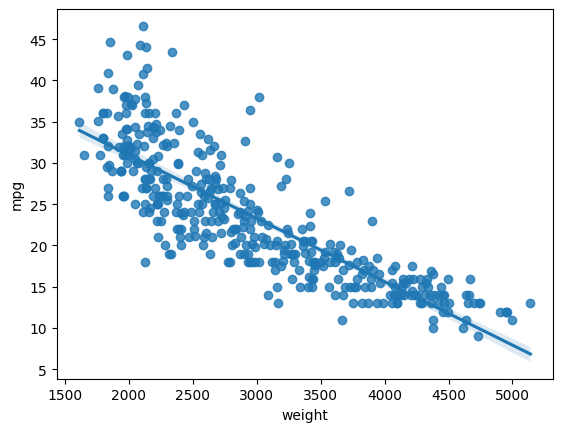

In [39]:
sns.regplot(df, y='mpg', x='weight')

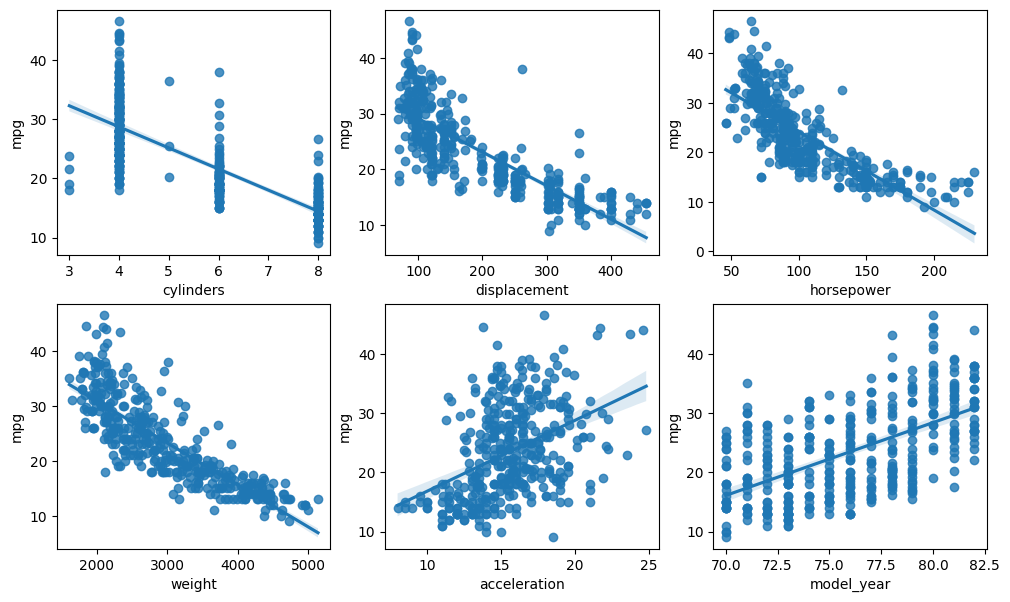

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
for idx, col in enumerate(numeric_col.columns[1:]):
    plt.subplot(2,3,idx+1)
    sns.regplot(df2, y='mpg', x=col)

plt.show()

In [41]:
df[['horsepower']].value_counts()
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [42]:
train_cols = ['displacement', 'horsepower', 'weight']
# 학습데이터와 정답을 분리
X = df2.loc[:,train_cols]
y = df2.loc[:,'mpg']

In [43]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [44]:
# 데이터의 모양을 확인합니다.
X.shape, y.shape # y는 series이므로

((392, 3), (392,))

In [45]:
# 데이터를 섞고 분리해야함
!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# 학습용과 테스트용 데이터 섞고 분리
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=45) # 시드값을 초기화, 데이터 고정, x,x,y,y 형태로 반환

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# sklearn 계열의 모델은 학습 순서 및 사용 메소드가 정해져 있음
# sklearn 계열 2차원 데이터를 원한다.
model = LinearRegression() # 기본 객체 생성
# 학습
model.fit(x_train, y_train)
# 평가 결정계수 이용해서 평가, 내부에서 예측도 같이 이루어진다.
# 결정계수는 1에 가까울수록 성능이 좋음
# 결정계수 : R^2 모델이 데이터의 변동성을 잘 설명하는지 나타내는 지표
# 1 - (SSR/SST)
# SSR : 잔차(Sum of Squares due to Regression) 정답-예측 차이의 제곱의 합
# SST : 실제값-평균값 제곱합(Total Sum of Squares)
score = model.score(x_test, y_test)
print(f'MSE의 값 : {score}') # 1에 가까울수록 좋음
# 예측
# y_predict = model.predict(x_test)

MSE의 값 : 0.7326398270789787


In [50]:
# MSE
from sklearn.metrics import mean_squared_error
y_predict = model.predict(x_test)
mean_squared_error(y_test, y_predict) # 두 값의 오차

np.float64(14.829729681913319)

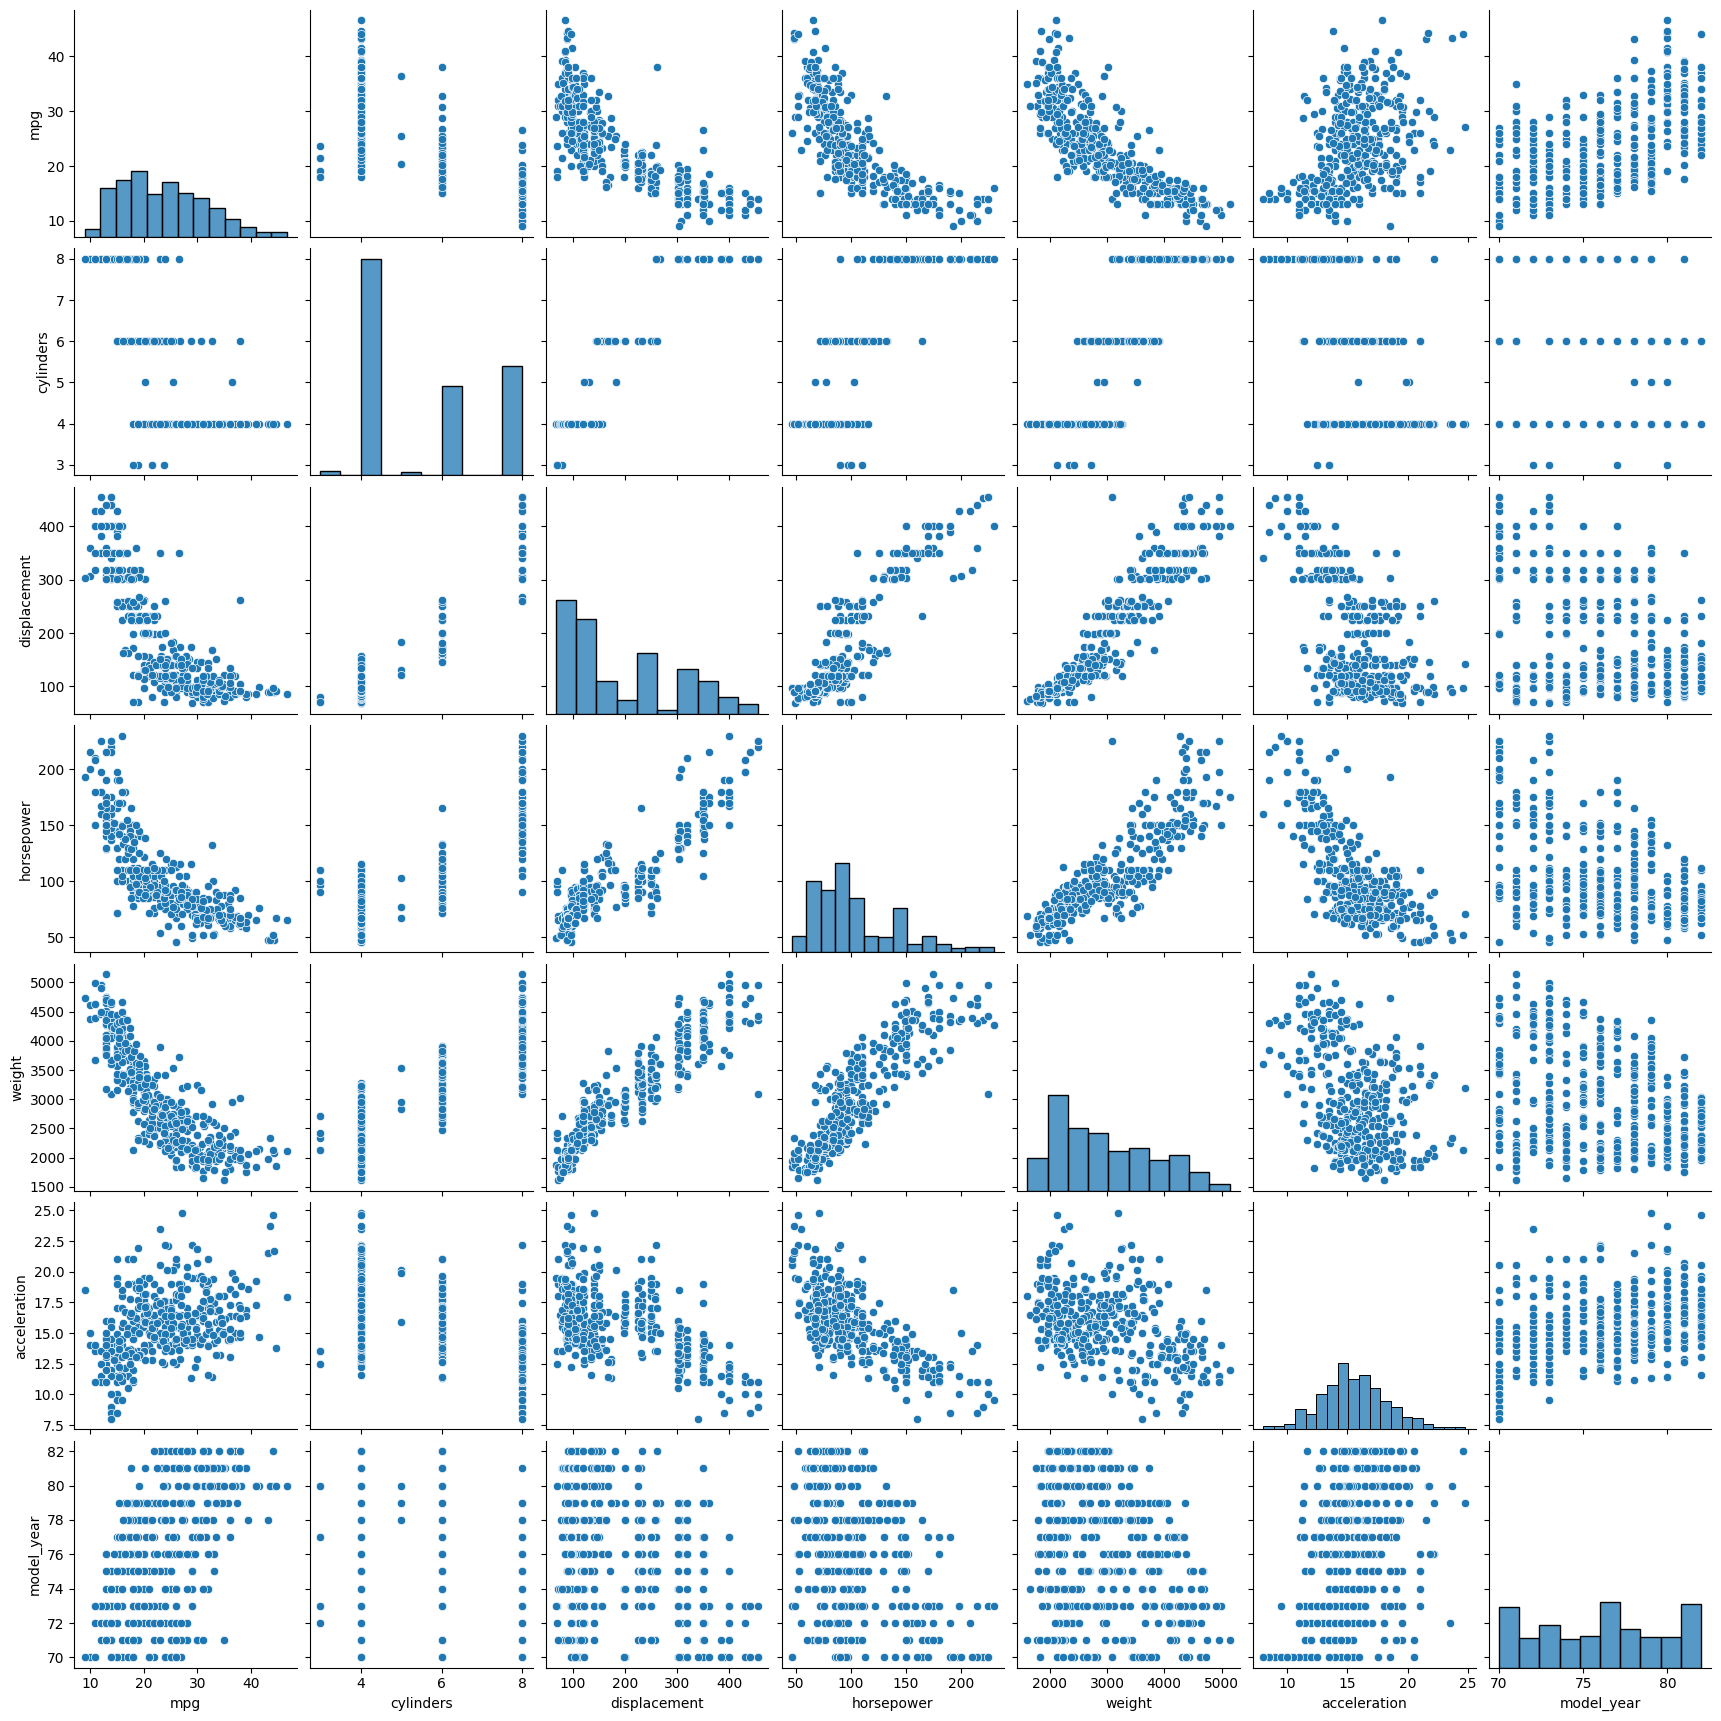

In [51]:
sns.pairplot(df)

In [52]:
import random
# random.seed(100)
for i in range(10):
    print(random.randint(1,100))

64
44
19
49
93
34
16
98
98
31


In [53]:
# 단순회귀(선형회귀) y = ax1 + bx2 = cx3 ....
# 선형계수 : a,b,c, 입력 데이터 : x1, x2, x3
x_train
# y = w1x1 + w2x2 + w3x3 + b 를 푼다
print(f'기울기 : {model.coef_} 절편 : {model.intercept_}')

기울기 : [-0.00610503 -0.03982949 -0.00529518] 절편 : 44.49785801830489


In [54]:
model.predict(x_test.iloc[[0]])

array([24.10158726])

In [55]:
arr = x_test.iloc[0].values
-0.00610503*arr[0] -0.03982949*arr[1] -0.00529518*arr[2] + 44.49785801830489

np.float64(24.10158116830489)

In [56]:
# 회귀분석

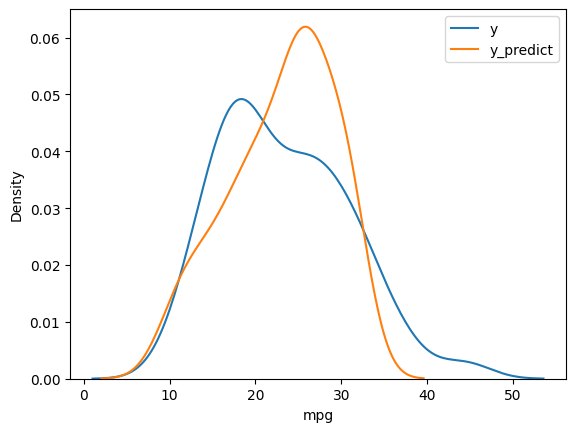

In [57]:
y_predict = model.predict(x_test)
sns.kdeplot(y_test, label = 'y')
sns.kdeplot(y_predict, label = 'y_predict')
plt.legend()
plt.show()

# 다중회귀분석

In [58]:
X = df2[['horsepower']]
y = df2['mpg']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [60]:
x_train.shape, y_train.shape

((294, 1), (294,))

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5655794324593799

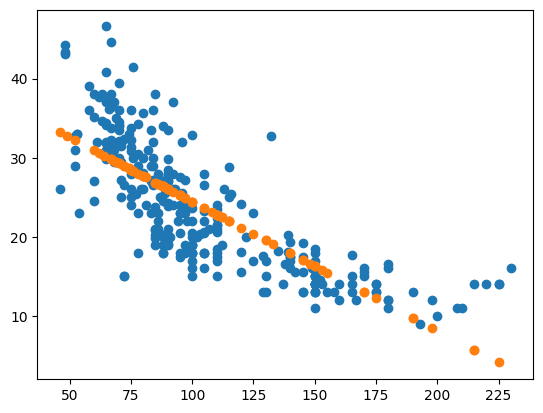

In [62]:
plt.scatter(x_train,y_train)
# plt.scatter(x_test,y_test)
plt.scatter(x_test,model.predict(x_test))

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
x_train_poly, x_test_poly, y_train, y_test = train_test_split(X_poly,y,random_state=42)

In [71]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
model.score(x_test_poly, y_test)

0.6585925564061343

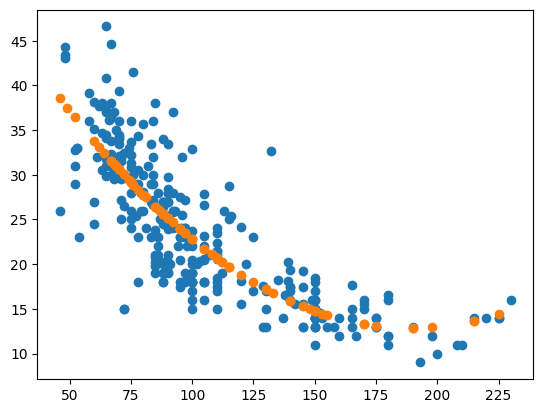

In [72]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, model.predict(x_test_poly))

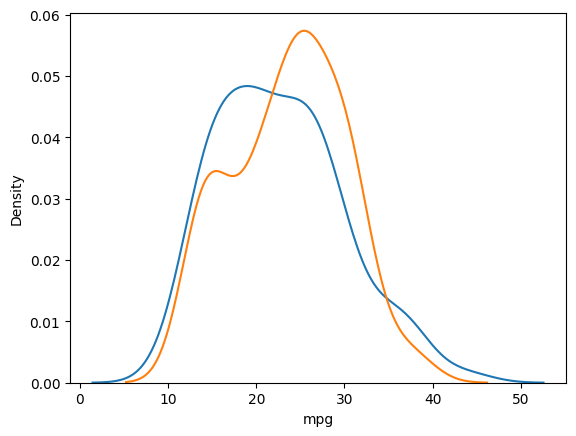

In [73]:
y_predict = model.predict(x_test_poly)
sns.kdeplot(y_test)
sns.kdeplot(y_predict)
plt.show()

In [131]:
# 회귀
    # 선형회귀(단항 다항) - 직선의 방정식
    # 비선형회귀(다중회귀) 차수를 2차원 이상으로 올려서 학습
    # 평가방법은 단순히 오차를 게산 ?? 이 값이 좋은지 나쁜지 모른다.
    # 0 ~ 1의 사이의 값을 가지는 R-Square   결정계수.... 1에 가까울수록 높은 성능 model.score 함수를 이용

In [135]:
# 단순선형보다는 비선형(부드러운 곡선)형태가 모델을 잘 설명해 줄 수 있다.
# 연비측정
# 데이터 고정 -> 먼저 모델 최적화 -> 데이터 튜닝
mpg_df = sns.load_dataset('mpg')
mpg_df.isna().sum()
mpg_df = mpg_df.dropna()
mpg_df = mpg_df.reset_index(drop=True)

In [152]:
train_cols = ['displacement', 'horsepower', 'weight']
X = mpg_df.loc[:,train_cols]
y = mpg_df['mpg']

In [153]:
# 데이터를 비선형으로 만들어준다... 일차방정식을 다차원 방정식으로 변환
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X) # fit 다차원 적용함
print(f'오리지널 shape {X.shape}, 다차원 변경 {X_poly.shape}')
# x1x2x3, x1x2, x2x3, x3x1, x1, x2, x3, 1 --> 다차원으로 변환

오리지널 shape (392, 3), 다차원 변경 (392, 10)


In [154]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# help(train_test_split)
# test_size=None, train_size=None 0~1사이 값을 둘 중 하나만 주면 나머지는 정해짐, 기본 0.25 test
x_train,x_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42) # 42가 가장 잘 나온다 카더라


In [159]:
# 모델선정
from sklearn.linear_model import LinearRegression
model = LinearRegression() # sklearn은 모델 적용방법이 다 같아 정의해주면 좋음
# 학습
model.fit(x_train, y_train)
# 평가 score 결정계수 R^2 0~1 1에 가까운 값이 best
# 시각적인 평가 밀도함수를 통해 차이를 본다
model.score(x_test, y_test)

0.7942349075428591

# 성능개선

In [161]:
# 스케일링
# train_cols = ['displacement', 'horsepower', 'weight']
train_cols = df2.select_dtypes(include=[int,float]).columns[1:]
X = mpg_df.loc[:,train_cols]
y = mpg_df['mpg']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures()
X_scaled_poly = poly.fit_transform(X_scaled)

x_train,x_test,y_train,y_test = train_test_split(X_scaled_poly,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.854628264876631

In [163]:
# 동일한 상황에서 결측치를 제거 안하고 대처했을 때
df2 = df.copy()
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
train_cols = df.select_dtypes(include=[int,float]).columns[1:]
X = df.loc[:,train_cols]
y = df['mpg']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures()
X_scaled_poly = poly.fit_transform(X_scaled)

x_train,x_test,y_train,y_test = train_test_split(X_scaled_poly,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8673129728615601

In [166]:
# df['origin'] 라벨링
# df['name'] 라벨링
# 범주형 데이터는 라벨링
from sklearn.preprocessing import LabelEncoder
test = ['a', 'b', 'a', 'c']
label = LabelEncoder()
label.fit_transform(test)

array([0, 1, 0, 2])

In [174]:
object_cols = df.select_dtypes(include='object').columns
label = LabelEncoder()
for col in object_cols:
    df[col] = label.fit_transform(df[col])
df.head()
df['horsepower'] = df['horsepower'].fillna(df.isnull().mean())

X = df.drop(columns='mpg')
y = df['mpg']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures()
X_scaled_poly = poly.fit_transform(X_scaled)

x_train,x_test,y_train,y_test = train_test_split(X_scaled_poly,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8739662956299645

In [175]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2'],
      dtype=object)

In [177]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

### 다형식에서 차수를 높였을 경우 학습용과 테스트용의  변화 및 성능 차이

In [179]:
# 차수를 높이면 학습용 데이터를 다 통과하려는 경향을 보이게 됨
# 데이터 가져오고
# 결측치 평균으로 대처
# 범주형 데이터를 라벨링
# 학습데이터와 정답을 분리
# 스케일링 맞춤
# 다형식으로 변경
# 학습용 테스트용 데이터 분리
# 선형모델 적용
# 학습데이터 스코어
# 테스트데이터 스코어

In [180]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [185]:
df = sns.load_dataset('mpg')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
obj_cols = df.select_dtypes(include='object').columns
label = LabelEncoder()
for col in obj_cols:
    df[col] = label.fit_transform(df[col])

# 학습데이터와 정답을 분리
X = df.drop(columns=['mpg'])
y = df['mpg']

# 스케일을 맞춤
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# 다항식으로 변경
for i in range(2,10):
    degree = i
    poly = PolynomialFeatures(degree = degree)
    X_scaled_poly = poly.fit_transform(X_scaled)

    # 학습용 테스트용 데이터 분리
    x_train,x_test,y_train,y_test = train_test_split(X_scaled_poly,y,test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'dgree={i} 결정계수 : train : {train_score}, test : {test_score}')

# train한 값보다 test가 약간 낮아야 좋은 모델
# 학습 모델값만 너무 신뢰
# overfitting - 과적합

dgree=2 결정계수 : train : 0.9007764563772469, test : 0.8739662956299645
dgree=3 결정계수 : train : 0.9439922432433152, test : 0.4295107312852441
dgree=4 결정계수 : train : 1.0, test : -29.97755167494255
dgree=5 결정계수 : train : 1.0, test : -19.413480288871824
dgree=6 결정계수 : train : 1.0, test : -103.66132359556643
dgree=7 결정계수 : train : 1.0, test : -193.10079067953717
dgree=8 결정계수 : train : 1.0, test : -1195.1571081954903
dgree=9 결정계수 : train : 1.0, test : -3660.3782336557333


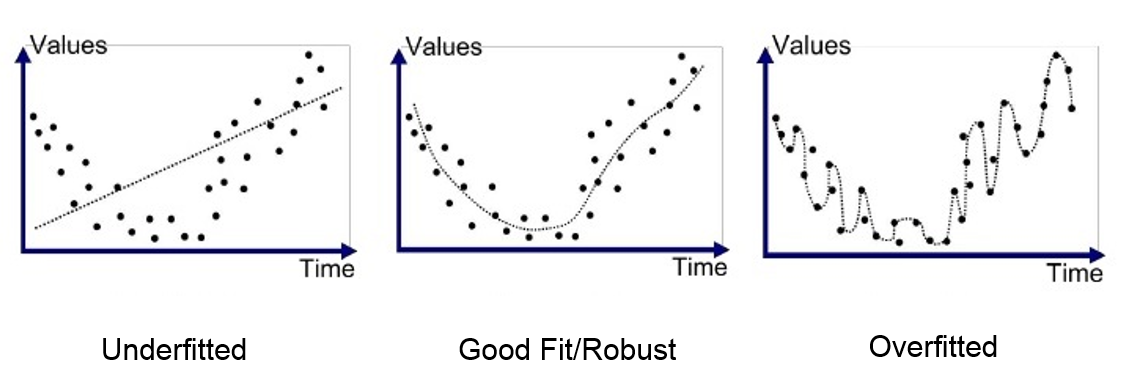

- 과적합을 피하려면? 
  - 학습데이터에 치우쳐져서(과도한 학습) 학습데이터의 성능은 좋지만 테스트 데이터는 낮은 성능 즉 둘 사이의 차이가 큰 경우
- 해결방안
  - 쉽게 생각하면 위의 그래프에서 그래프를 살짝 펴준다고 생각
  - 1. 학습 횟수를 줄인다. (여기서는 차수를 줄인다)
  - 2. 데이터를 확보해서 충분히 많은 데이터를 학습에 적용한다. --> 현실적으로 불가능

In [187]:
# 과적합에 패널티 부여

In [188]:
# 앙상블 - 여러개의 모델을 통합해서 만드는 모델
# randomforest

In [189]:
# 데이터 잘 가공하기
# 최신 모델

In [190]:
# 특성공학
# 다중회귀

In [191]:
# 분류와 회귀는 알고릐즘 상 비슷함

In [ ]:
# 8 : 2 분할

In [405]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [406]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [407]:
df = sns.load_dataset('tips')

In [408]:
df0 =df.copy()
df.info()
# df.drop(columns=['tip','time'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [409]:
df['time'].unique

<bound method Series.unique of 0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']>

In [410]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [411]:
cat_cols = df.select_dtypes(include='category').columns
cat_cols
label = LabelEncoder()
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

In [435]:
# X = df.drop(columns=['tip','smoker','time','day','sex'])
X = df[['total_bill']]
y = df['tip']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled ,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
train_score = model.score(x_train,y_train)
test_score = model.score(x_test, y_test)
print(f'dgree={1} 결정계수 : train : {train_score}, test : {test_score}')

for i in range(2, 10):
    degree = i
    poly = PolynomialFeatures(degree = degree)
    X_scaled_poly = poly.fit_transform(X_scaled)
    x_train,x_test,y_train,y_test = train_test_split(X_scaled_poly,y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test, y_test)
    print(f'dgree={i} 결정계수 : train : {train_score}, test : {test_score}')

dgree=1 결정계수 : train : 0.43095110383706514, test : 0.5449381659234666
dgree=2 결정계수 : train : 0.4317384170086367, test : 0.5300165292317478
dgree=3 결정계수 : train : 0.453573741359909, test : 0.5090527056971554
dgree=4 결정계수 : train : 0.50116830072778, test : 0.3841686891746532
dgree=5 결정계수 : train : 0.5062839427729706, test : 0.4688194152597308
dgree=6 결정계수 : train : 0.5126072970651391, test : 0.32558995504651544
dgree=7 결정계수 : train : 0.5136429131452203, test : 0.46590749380385243
dgree=8 결정계수 : train : 0.5309957474217348, test : -0.893484493883631
dgree=9 결정계수 : train : 0.5374887786981721, test : 0.3218530588459395


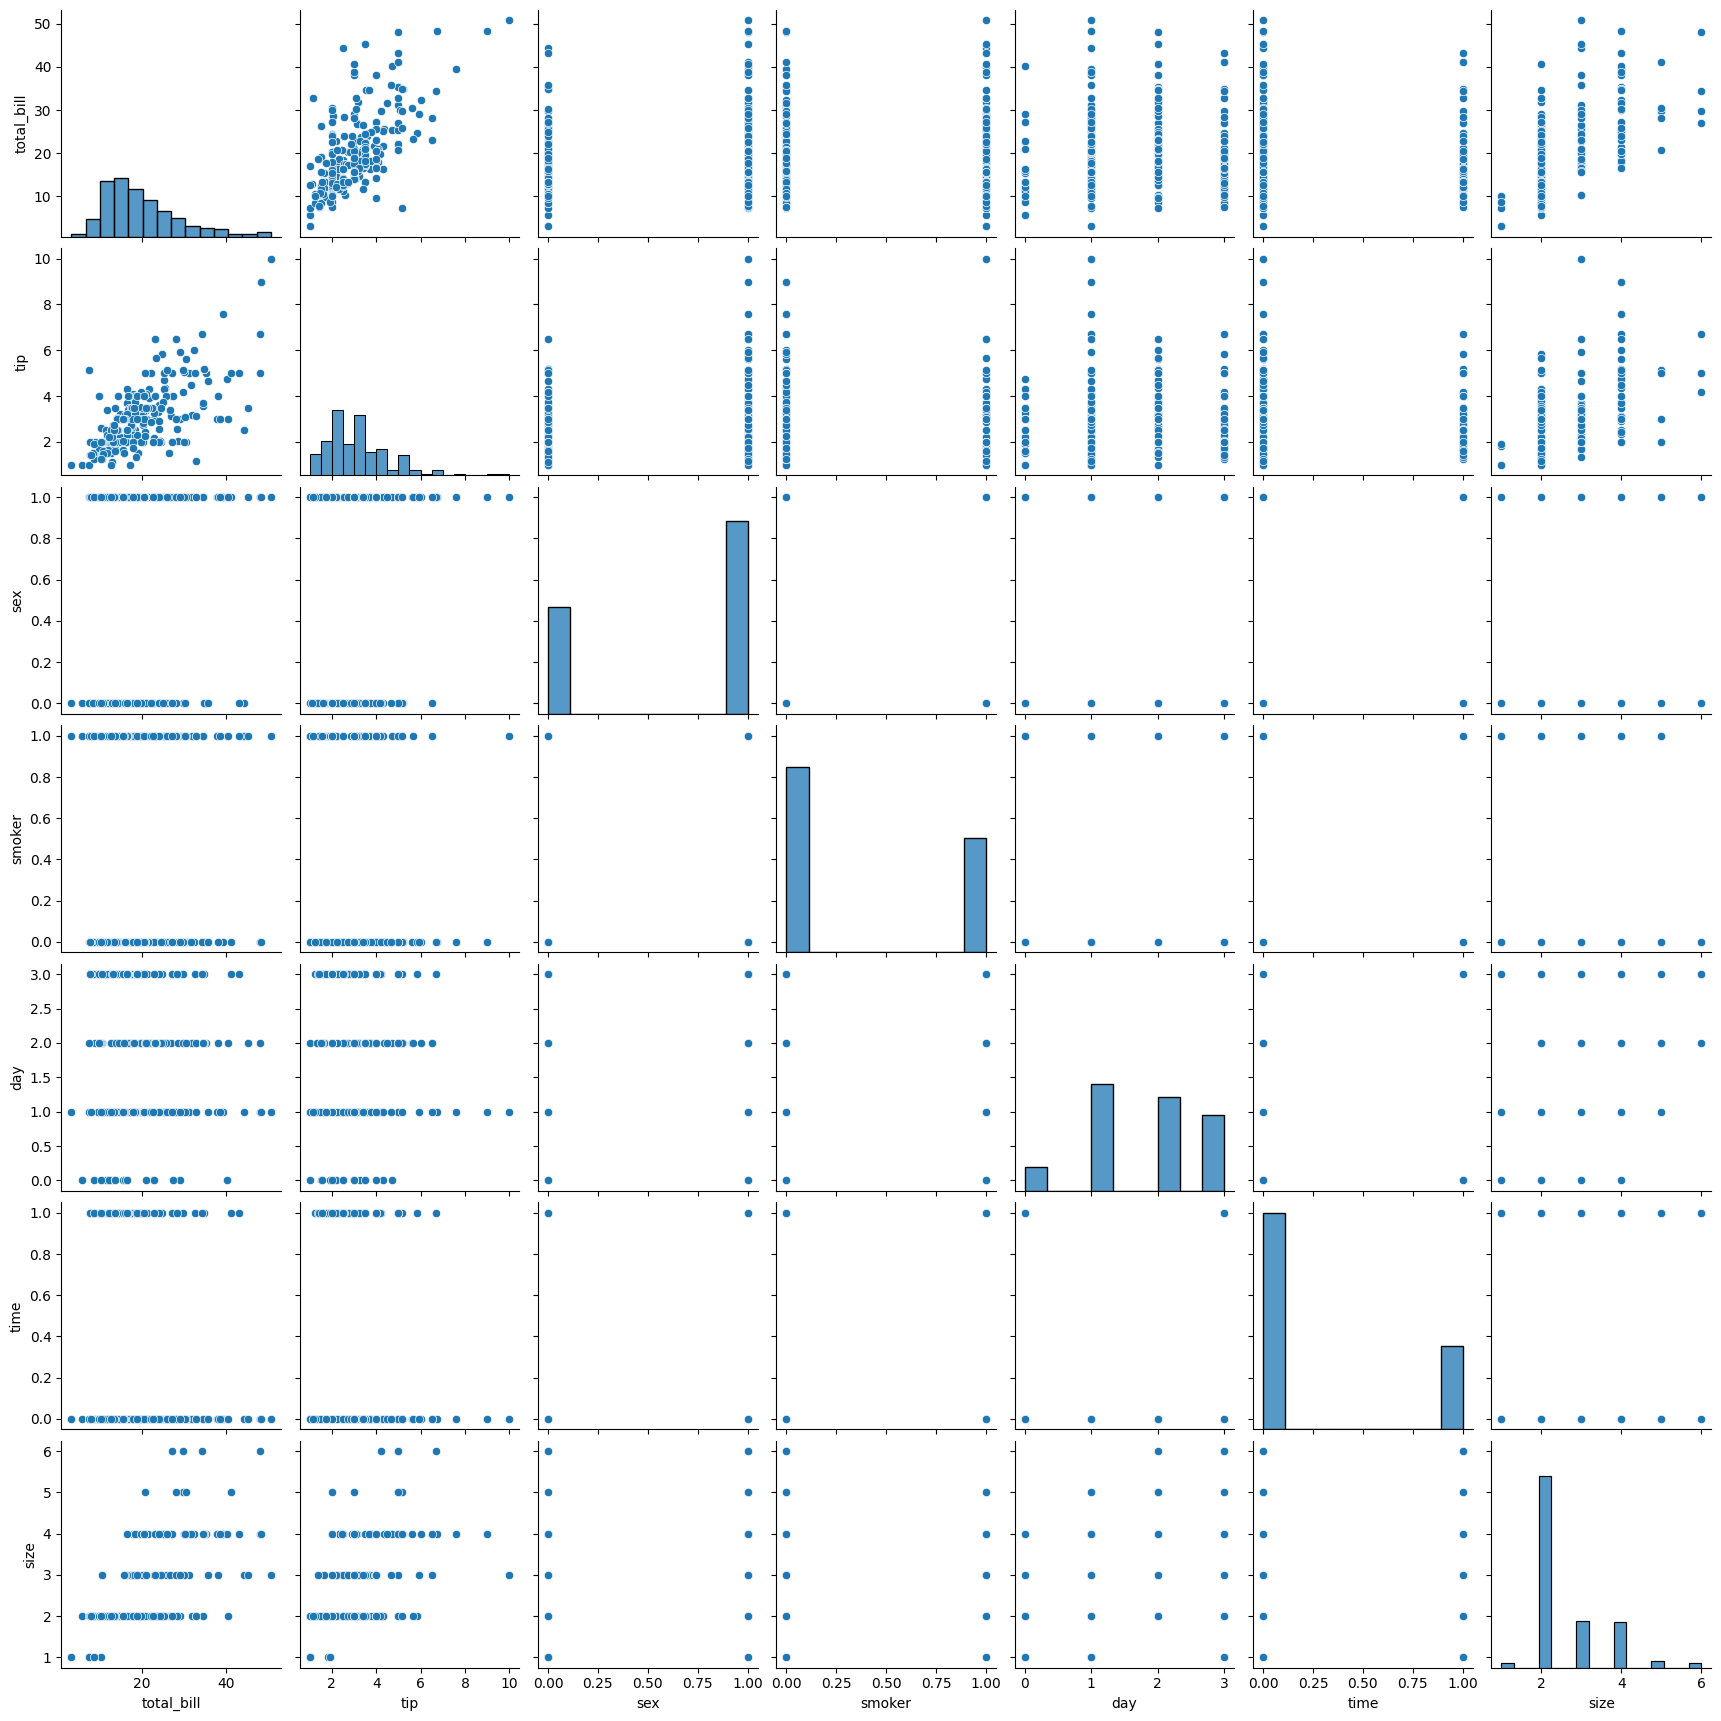

In [413]:
sns.pairplot(df)

<Axes: xlabel='day', ylabel='tip'>

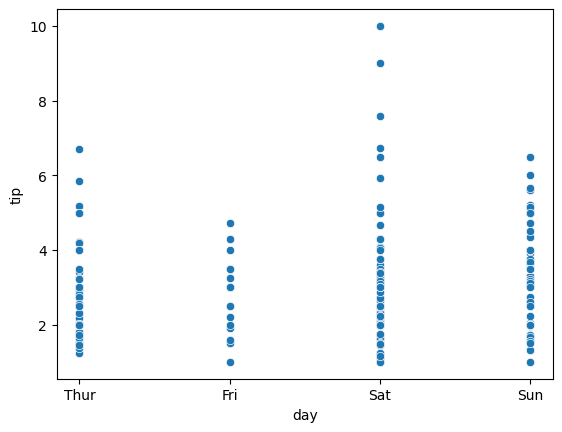

In [414]:
# 요일에 따른 팁의 현황
sns.scatterplot(df0, x='day', y='tip')

In [415]:
df = df0.copy()
label = LabelEncoder()
df2 = df.copy()
for col in ['sex', 'smoker', 'time']:
    df2[col] = label.fit_transform(df2[col])

df2['day'] = df2['day'].apply(lambda x : 1 if x == 'Sat' else 0)
df2.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


In [430]:
# X = df2.drop(columns='tip')
X = df2[['total_bill']]
y= df2['tip']

x_scale = scaler.fit_transform(PolynomialFeatures(degree=2).fit_transform(X))
x_train,x_test,y_train,y_test = train_test_split(x_scale, y, train_size=0.2, random_state=42)

In [431]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge()
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test,y_test)

(0.3373340496058641, 0.48918580208770646)

In [432]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load the tips dataset
tips = sns.load_dataset('tips')

# Split the dataset into training and testing sets (80:20)
train, test = train_test_split(tips, test_size=0.2, random_state=42)

# Prepare the data for training
X_train = train[['total_bill', 'size']]
Y_train = train['tip']
X_test = test[['total_bill', 'size']]
Y_test = test['tip']

# Create a polynomial regression model to capture non-linear relationships
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, Y_train)

# Check the model score
score_tuned = poly_model.score(X_test, Y_test)
print("Tuned Model Score:", score_tuned)

Tuned Model Score: 0.392065143036215


In [433]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Split the dataset into training and testing sets (80:20)
train, test = train_test_split(tips, test_size=0.2, random_state=42)

# Prepare the data for training
X_train = train[['total_bill', 'size']]
Y_train = train['tip']
X_test = test[['total_bill', 'size']]
Y_test = test['tip']

# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, Y_train)

# Evaluate the model
score = model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, model.predict(X_test))
r_squared = r2_score(Y_test, model.predict(X_test))

# Output the results
print("Model Score:", score)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Model Score: 0.3595015103691481
Mean Squared Error: 0.8006047587290743
R-squared: 0.3595015103691481


In [434]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Calculate the IQR for identifying outliers
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_tips = tips[(tips['tip'] >= lower_bound) & (tips['tip'] <= upper_bound)]

# Split the cleaned dataset into training and testing sets (80:20)
train, test = train_test_split(cleaned_tips, test_size=0.2, random_state=42)

# Prepare the data for training
X_train = train[['total_bill', 'size']]
Y_train = train['tip']
X_test = test[['total_bill', 'size']]
Y_test = test['tip']

# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, Y_train)

# Evaluate the model
score = model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, model.predict(X_test))
r_squared = r2_score(Y_test, model.predict(X_test))

# Output the results
print("Model Score:", score)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Model Score: 0.383954977951361
Mean Squared Error: 0.6981490707572264
R-squared: 0.383954977951361
